# Visualizing the Research Space

Visualizing it as a graph shows us how different arreas are interconneted

In [1]:
import sys
sys.path.append("../")
from lib.rs import research_space

In [2]:
import pandas as pd
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [3]:
key = "sjr"
rs = research_space(key)
rs.load(2011)

### Our data

Loading our macro and intermediate classifications

In [4]:
areas = pd.read_pickle("../../dataset/SJR/areas.pkl")
areas.head()

,Code,Field,Subject area,Classification
0,1000.0,multidisciplinary,health sciences,multidisciplinary
1,1100.0,general agricultural and biological sciences,life sciences,agricultural and biological sciences
2,1101.0,agricultural and biological sciences (miscella...,life sciences,agricultural and biological sciences
3,1102.0,agronomy and crop science,life sciences,agricultural and biological sciences
4,1103.0,animal science and zoology,life sciences,agricultural and biological sciences


### Plots

Using macro subjects

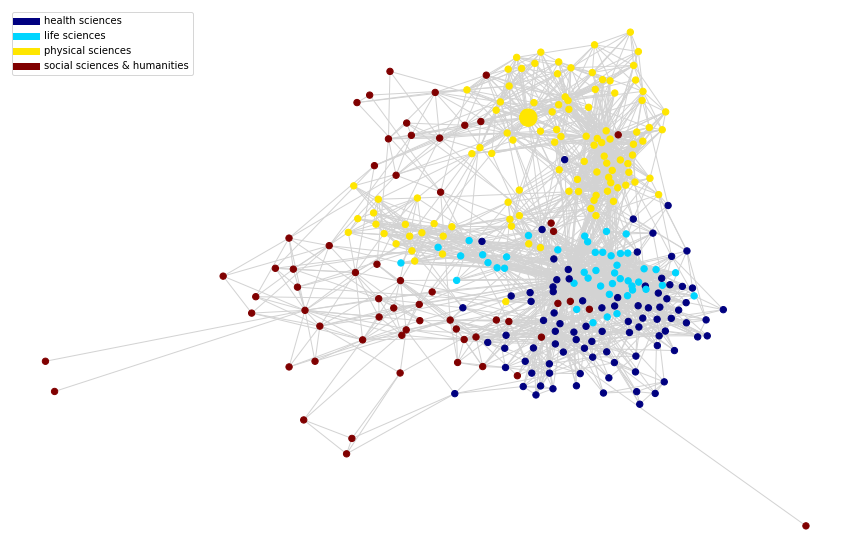

In [10]:
dict_area = areas[["Field", "Subject area"]].set_index("Field").to_dict()["Subject area"]
unique = areas["Subject area"].unique()
subs = {u: v for v,u in enumerate(sorted(unique))}
values = [subs[dict_area[node]] for node in rs.fields]

pos = rs.plot(values, labels=subs)

Threshold slider

In [11]:
def f(th):
    rs.plot(values, labels=subs, threshold=th)

interact(f, th=(0.05,0.95,0.05))

interactive(children=(FloatSlider(value=0.45, description='th', max=0.95, min=0.05, step=0.05), Output()), _do…

<function __main__.f(th)>

Intermediate classification

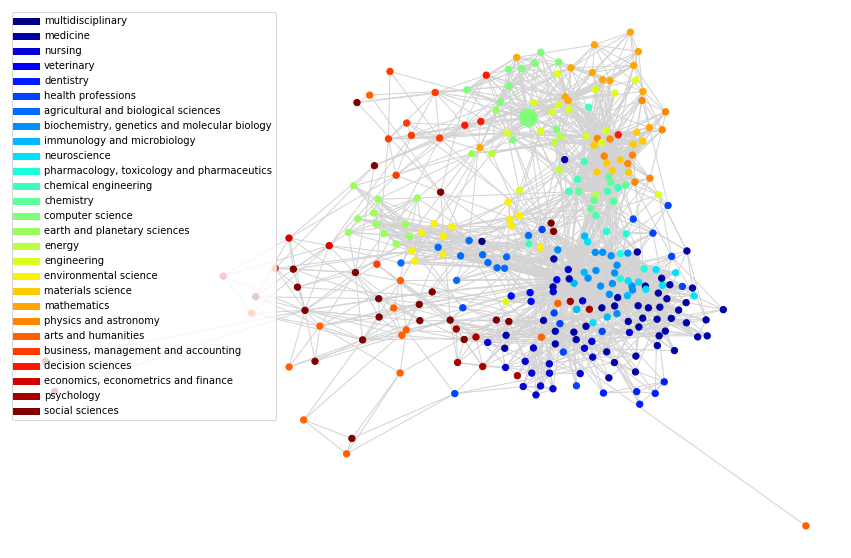

In [12]:
dict_area = areas[["Field", "Classification"]].set_index("Field").to_dict()["Classification"]
dict_catg = areas[["Classification", "Subject area"]].set_index("Classification").to_dict()["Subject area"]
unique = areas["Classification"].unique()
subs = {u: v for v,u in enumerate(sorted(unique, key=lambda x: dict_catg[x]))}
values = [subs[dict_area[node]] for node in rs.fields]

pos = rs.plot(values, labels=subs)